In [11]:
import os
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import tensorflow as tf


# 读取数据，构造训练集和测试集

In [12]:
def load_data():
    # 读取数据
    x = np.load('train_data/train_data.npy')
    y = np.load('train_data/label.npy')
    num = len(Counter(y))
    print("类别数量为：", num)
    return x, y, num


In [13]:

def create_train_data(x, y, ratio=0.8):
    """
    x:数据
    y:类别
    ratio:生成训练集比率
    """
    # 打乱顺序
    # 读取data矩阵的第一维数（图片的个数）
    num_example = x.shape[0]
    # 产生一个num_example范围，步长为1的序列
    arr = np.arange(num_example)
    # 调用函数，打乱顺序
    np.random.seed(99)
    np.random.shuffle(arr)
    # 按照打乱的顺序，重新排序
    arr_data = x[arr]
    arr_label = y[arr]
    # 将数据集分为训练集80%、测试集20%
    s = int(num_example * ratio)
    x_train = arr_data[:s]
    y_train = arr_label[:s]
    x_val = arr_data[s:]
    y_val = arr_label[s:]
    print("训练集shape", x_train.shape)
    print("训练集类别：", Counter(y_train))
    print("测试集shape", x_val.shape)
    print("测试集类别：", Counter(y_val))
    return x_train, y_train, x_val, y_val



# 读取数据

In [14]:
data, label, label_count = load_data()
# 生成训练集测试集,70%用作训练，30%用作测试
train_data, train_label, val_data, val_label = create_train_data(data, label, 0.7)
# # 从val_data和val_label中拿出最后1个元素作为测试组
# test_data = val_data[-1:]
# test_label = val_label[-1:]
# 
# # 移除val_data和val_label中的最后1个元素
# val_data = val_data[:-1]
# val_label = val_label[:-1]
print("*" * 10)
print("训练集数量：", len(train_label))
print("测试集数量：", len(val_label))
# print("测试组数量：",len(test_label))

类别数量为： 4
训练集shape (3919, 1000, 2)
训练集类别： Counter({0: 989, 2: 987, 3: 979, 1: 964})
测试集shape (1681, 1000, 2)
测试集类别： Counter({1: 436, 3: 421, 2: 413, 0: 411})
**********
训练集数量： 3919
测试集数量： 1681



# 数据集构建

In [15]:
# 使用机器学习算法需要对多维数据进行降维
m_train = train_data.reshape(train_data.shape[0], train_data.shape[1] * train_data.shape[2])
m_val = val_data.reshape(val_data.shape[0], val_data.shape[1] * val_data.shape[2])
# m_test = test_data.reshape(test_data.shape[0],test_data.shape[1]*test_data.shape[2])
# 设置训练迭代次数
epoch = 20


# 随机森林

In [16]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, log_loss
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import model_selection
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import normalize

In [17]:

## 模型训练
# 模型参数设置
rfc = RandomForestClassifier(n_estimators=50, min_samples_split=5, min_samples_leaf=4, max_depth=5)

# 模型准确率和损失值
acc_list = []
# loss_list = []
train_acc_list = []
print("开始训练")
for i in range(1, epoch + 1):
    # 模型训练
    rfc.fit(m_train, train_label)

    # # 训练集
    # y_train = rfc.predict(m_train)

    # 测试集
    y_pred = np.asarray(rfc.predict(m_val), dtype='int64')

    # 计算准确率
    acc = round(accuracy_score(val_label, y_pred), 3)

    # 训练集
    y_pred = np.asarray(rfc.predict(m_train), dtype='int64')
    # 计算准确率
    train_acc = round(accuracy_score(train_label, y_pred), 3)

    # print('测试集准确率:', round(accuracy_score(val_label, y_pred),3))
    acc_list.append(acc)
    train_acc_list.append(train_acc)

    # 计算损失值
    # 使用one-hot编码计算损失值
    # noe_hot = OneHotEncoder(sparse_output=False)
    # 
    # y_pred_o = noe_hot.fit_transform(y_pred.reshape(1, -1))
    # val_label_o = noe_hot.fit_transform(train_label.reshape(1, -1))

    # loss = round(log_loss(val_label_o,y_pred_o),3)
    # print("loss：",loss)
    # loss_list.append(loss)
    print("完成第", i, "轮训练，测试集准确率：", acc)

开始训练
完成第 1 轮训练，测试集准确率： 0.741
完成第 2 轮训练，测试集准确率： 0.739
完成第 3 轮训练，测试集准确率： 0.72
完成第 4 轮训练，测试集准确率： 0.736
完成第 5 轮训练，测试集准确率： 0.746
完成第 6 轮训练，测试集准确率： 0.729
完成第 7 轮训练，测试集准确率： 0.723
完成第 8 轮训练，测试集准确率： 0.742
完成第 9 轮训练，测试集准确率： 0.745
完成第 10 轮训练，测试集准确率： 0.736
完成第 11 轮训练，测试集准确率： 0.714
完成第 12 轮训练，测试集准确率： 0.725
完成第 13 轮训练，测试集准确率： 0.735
完成第 14 轮训练，测试集准确率： 0.732
完成第 15 轮训练，测试集准确率： 0.726
完成第 16 轮训练，测试集准确率： 0.75
完成第 17 轮训练，测试集准确率： 0.723
完成第 18 轮训练，测试集准确率： 0.736
完成第 19 轮训练，测试集准确率： 0.72
完成第 20 轮训练，测试集准确率： 0.719


## 测试集得分

In [18]:
y_pred = np.asarray(rfc.predict(m_val), dtype='int64')
print('------------------测试集上得分：------------------------')
print('*' * 5)
print('测试集准确率得分:', round(accuracy_score(val_label, y_pred), 3))
print('*' * 5)
print('准确率、召回率、f1-值测试报告如下:\n', classification_report(val_label, y_pred))

------------------测试集上得分：------------------------
*****
测试集准确率得分: 0.719
*****
准确率、召回率、f1-值测试报告如下:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90       411
           1       0.71      0.76      0.73       436
           2       0.52      0.36      0.43       413
           3       0.75      0.75      0.75       421

    accuracy                           0.72      1681
   macro avg       0.70      0.72      0.70      1681
weighted avg       0.70      0.72      0.70      1681




## 模型迭代准确率

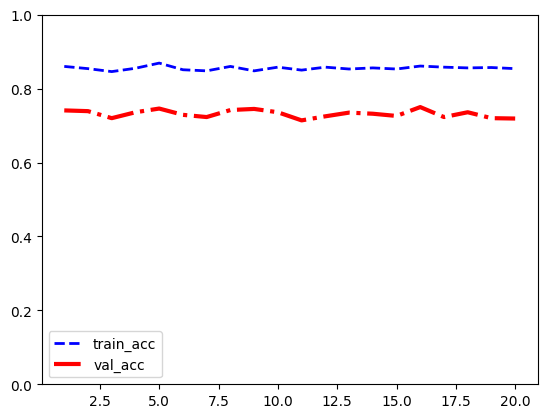

In [19]:
# 设置Y轴范围
plt.ylim(0, 1)
# 训练准确率曲线
show_data1 = train_acc_list
# 测试准确率曲线
show_data2 = acc_list
x_data = list(range(1, len(show_data1) + 1))
ln1, = plt.plot(x_data, show_data1, color='blue', linewidth=2.0, linestyle='--')
ln2, = plt.plot(x_data, show_data2, color='red', linewidth=3.0, linestyle='-.')
plt.legend(handles=[ln1, ln2], labels=['train_acc', 'val_acc'])
plt.show()

## 保存模型

In [20]:
from joblib import dump, load

# 保存模型
dump(rfc, 'models_save/rfc.joblib')
# # 加载
# rfc = load('models_save/rfc.joblib')
# print(rfc)

['models_save/rfc.joblib']

# SVM

In [21]:
from sklearn import svm  # 引入SVM库

# 读取数据

In [22]:
data, label, label_count = load_data()
# 生成训练集测试集,70%用作训练，30%用作测试
train_data, train_label, val_data, val_label = create_train_data(data, label, 0.7)

print("*" * 10)
print("训练集数量：", len(train_label))
print("测试集数量：", len(val_label))
# 使用机器学习算法需要对多维数据进行降维
m_train = train_data.reshape(train_data.shape[0], train_data.shape[1] * train_data.shape[2])
m_val = val_data.reshape(val_data.shape[0], val_data.shape[1] * val_data.shape[2])

类别数量为： 4
训练集shape (3919, 1000, 2)
训练集类别： Counter({0: 989, 2: 987, 3: 979, 1: 964})
测试集shape (1681, 1000, 2)
测试集类别： Counter({1: 436, 3: 421, 2: 413, 0: 411})
**********
训练集数量： 3919
测试集数量： 1681


In [23]:
# 设置训练迭代次数
epoch = 20
# 模型参数设置
svm_model = svm.SVC(kernel='rbf', gamma='scale', probability=True)  # SVM模型的构建

# 模型准确率列表
acc_list = []
train_acc_list = []
print("开始训练")
# for i in range(1, epoch + 1):
# 模型训练
svm_model.fit(m_train, train_label)

# 测试集
y_pred = np.asarray(svm_model.predict(m_val), dtype='int64')

# 计算准确率
acc = round(accuracy_score(val_label, y_pred), 3)

# 训练集
y_pred_train = np.asarray(svm_model.predict(m_train), dtype='int64')
train_acc = round(accuracy_score(train_label, y_pred_train), 3)

acc_list.append(acc)
train_acc_list.append(train_acc)

print("完成SVM训练，测试集准确率：", acc)

开始训练
完成SVM训练，测试集准确率： 0.891


In [24]:
y_pred_final = np.asarray(svm_model.predict(m_val), dtype='int64')
print('------------------测试集上得分：------------------------')
print('*' * 5)
print('测试集准确率得分:', round(accuracy_score(val_label, y_pred_final), 3))
print('*' * 5)
print('准确率、召回率、f1-值测试报告如下:\n', classification_report(val_label, y_pred_final))

------------------测试集上得分：------------------------
*****
测试集准确率得分: 0.891
*****
准确率、召回率、f1-值测试报告如下:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       411
           1       0.84      0.96      0.90       436
           2       0.88      0.77      0.82       413
           3       0.85      0.83      0.84       421

    accuracy                           0.89      1681
   macro avg       0.89      0.89      0.89      1681
weighted avg       0.89      0.89      0.89      1681



In [25]:
from joblib import dump, load

# 保存模型
dump(svm_model, 'models_save/svm.joblib')
# # 加载
# svm = load('models_save/svm.joblib')
# print(svm)

['models_save/svm.joblib']